In [1]:
import pandas as pd
import numpy as np
from time import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("cardiologico.csv", header=0, encoding= "latin-1")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   1                                             200 non-null    int64
 1   1.1                                           200 non-null    int64
 2   Peso                                          200 non-null    int64
 3   Difultad para caminar o subir las escaleras   200 non-null    int64
 4   Tabaquismo                                    200 non-null    int64
 5   Actividad Fisica                              200 non-null    int64
 6   Diabetes                                      200 non-null    int64
 7   Lesiones fisicas o enfermedades fisicas       200 non-null    int64
 8   Fruta                                         200 non-null    int64
 9   Vegetales                                     200 non-null    int64
 10  Alcohol       

In [3]:
data_df['Ataque al corazon o otra enfermedad cardiaca'].value_counts()

0    146
1     54
Name: Ataque al corazon o otra enfermedad cardiaca, dtype: int64

In [4]:
lista_caract = [
    '1',
    '1.1',
    'Peso',
    'Difultad para caminar o subir las escaleras',
    'Tabaquismo',
    'Actividad Fisica',
    'Diabetes',
    'Lesiones fisicas o enfermedades fisicas',
    'Fruta',
    'Vegetales',
    'Alcohol',
    'Obra Social',
    'Estado de salud en general',
    'Estrés',
    'Derrame cerebral o estuvo cerca',
    'Hipertencion Arterial',
    'Colesterol Alto',
    'Se controla el colesterol cada año',
    'Antecedentes de enfermedades cardiacas',
    'Difucultad para respirar',
    'Te haces estudios de corazon con frecuencia'
]

X = data_df[lista_caract]
X.head()

,1,1.1,Peso,Difultad para caminar o subir las escaleras,Tabaquismo,Actividad Fisica,Diabetes,Lesiones fisicas o enfermedades fisicas,Fruta,Vegetales,...,Obra Social,Estado de salud en general,Estrés,Derrame cerebral o estuvo cerca,Hipertencion Arterial,Colesterol Alto,Se controla el colesterol cada año,Antecedentes de enfermedades cardiacas,Difucultad para respirar,Te haces estudios de corazon con frecuencia
0,1,19,67,0,0,1,0,0,1,1,...,1,1,0,0,0,0,1,0,0,1
1,0,49,70,1,0,0,0,0,1,1,...,1,0,1,0,1,1,1,0,0,1
2,1,49,80,0,1,1,0,1,1,1,...,1,1,0,0,0,0,0,0,0,0
3,0,25,56,0,0,0,0,0,0,1,...,1,1,1,0,0,0,1,0,1,1
4,1,21,68,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,1


In [5]:
lista_etiq = ['Ataque al corazon o otra enfermedad cardiaca'] 
y = data_df[lista_etiq]
y.head()

,Ataque al corazon o otra enfermedad cardiaca
0,0
1,1
2,0
3,0
4,1


In [6]:
X_train, X_test, y_train, y_test = train_test_split(    
    X,     
    y 
)

In [7]:
X_train.shape

(150, 21)

In [8]:
y_train.shape

(150, 1)

In [9]:
X_test.shape

(50, 21)

In [10]:
y_test.shape

(50, 1)

In [11]:
clf = SVC(kernel='linear')

In [12]:
hora_inicio = time()
clf.fit(X_train.values, y_train.values.ravel())
print("Entrenamiento terminado en {} segundos".format(time() - hora_inicio))

Entrenamiento terminado en 0.032002925872802734 segundos


In [13]:
hora_inicio = time()
y_pred = clf.predict(X_test)
print("Predicción terminada en {} segundos".format(time() - hora_inicio))

Predicción terminada en 0.003998756408691406 segundos


c:\Users\WINDOWS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


In [14]:
accuracy_score(y_test, y_pred)

0.74

In [15]:
conf_data = confusion_matrix(y_test, y_pred)
conf_data

array([[28,  7],
       [ 6,  9]], dtype=int64)

In [16]:
def plot_cm(cm, classes):     
    plt.imshow(cm, cmap=plt.cm.Blues)     
    plt.title('Matriz de confusión')     
    plt.colorbar()     
    tick_marks = np.arange(len(classes))     
    plt.xticks(tick_marks, classes, rotation=45)     
    plt.yticks(tick_marks, classes)     
    thresh = cm.max() / 1.     
    for indice_fila, fila in enumerate(cm):        
        for indice_columna, columna in enumerate(fila):             
            if cm[indice_fila, indice_columna] > thresh:                 
                color = "white"          
            else:                
                color = "black"            
                plt.text(                 
                         indice_columna,                
                         indice_fila,                 
                         cm[indice_fila, indice_columna],                
                         color=color,                 
                         horizontalalignment="center"             
                         )     
    plt.ylabel("Valores reales")     
    plt.xlabel("Valores calculados")     
    plt.show()

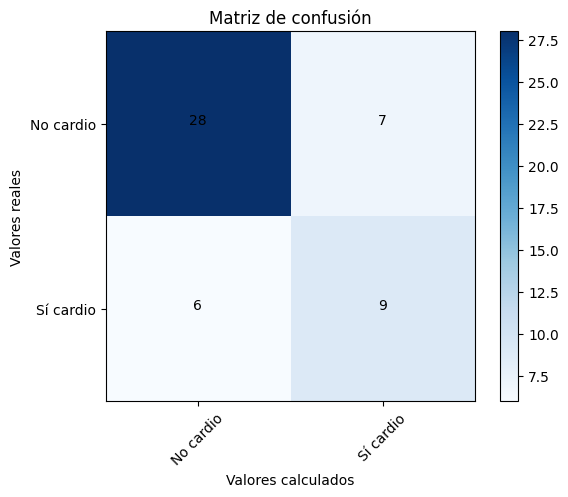

In [17]:
plot_cm(conf_data, ['No cardio', 'Sí cardio'])